# Exploratory Data Analysis (EDA)

### Obsah<a class='anchor' id='top'></a>
* [Dataset so syntetickými dátami](#Syntheticdatadataset)
    * [Chýbajúce hodnoty, dátové typy, duplikáty a deskriptívna štatistika](#1)
    * [Vizualizácia dát](#2)
    * [Záver](#3)
    * [Korelácia](#4)
* [Dataset s reálnymi dátami](#Realdatadataset)
    * [Chýbajúce hodnoty, dátové typy, duplikáty a deskriptívna štatistika](#5)
    * [Vizualizácia dát](#6)
    * [Záver](#8)
    * [Predspracovanie dát](#7)

* [Výber metrík](#feature_selecion)
* [Záver](#Záver)
* [Referencie](#Referencie)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
from sklearn.utils.class_weight import compute_class_weight
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Dataset zo syntetickej premávky <a class="anchor" id="Syntheticdatadataset"></a>

In [2]:
data = pd.read_csv("../synthetic_data.csv")
data.head()

timestamp  amf_session_value  bearers_active_value  \
0  2025-04-11 14:41:57                4.0                   4.0   
1  2025-04-11 14:41:58                4.0                   4.0   
2  2025-04-11 14:41:59                4.0                   4.0   
3  2025-04-11 14:42:00                4.0                   4.0   
4  2025-04-11 14:42:01                4.0                   4.0   

   fivegs_amffunction_amf_authreject_value  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   fivegs_amffunction_amf_authreq_value  \
0                                   4.0   
1                                   4.0   
2                                   4.0   
3                                   4.0   
4                                   4.0   

   fivegs_amffunction_mm_confupdate_value  \
0                                     4.0   
1                                     4.0   
2                                     4.0   
3                                     4.0   
4                                     4.0   

   fivegs_amffunction_mm_confupdatesucc_value  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   fivegs_amffunction_mm_paging5greq_value  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   fivegs_amffunction_mm_paging5gsucc_value  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   fivegs_amffunction_rm_regemergreq_value  ...  \
0                                      0.0  ...   
1                                      0.0  ...   
2                                      0.0  ...   
3                                      0.0  ...   
4                                      0.0  ...   

   process_resident_memory_bytes_value  process_start_time_seconds_value  \
0                           52657356.8                      3.644742e+08   
1                           52657356.8                      3.644742e+08   
2                           52657356.8                      3.644742e+08   
3                           52657356.8                      3.644742e+08   
4                           52657356.8                      3.644742e+08   

   process_virtual_memory_bytes_value  process_virtual_memory_max_bytes_value  \
0                        1.151508e+09                                    -1.0   
1                        1.151508e+09                                    -1.0   
2                        1.151508e+09                                    -1.0   
3                        1.151508e+09                                    -1.0   
4                        1.151508e+09                                    -1.0   

   ran_ue_value  s5c_rx_createsession_value  s5c_rx_parse_failed_value  \
0           0.0                         0.0                        0.0   
1           0.0                         0.0                        0.0   
2           0.0                         0.0                        0.0   
3           0.0                         0.0                        0.0   
4           0.0                         0.0                        0.0   

   application  log_type  current_uc  
0            0         0         uc6  
1            0         0         uc6  
2            0         0         uc6  
3            0         0         uc6  
4            0         0         uc6  

[5 rows x 58 colu

#### Chýbajúce hodnoty, Dátové typy, Duplikáty a Deskriptívna štatistika <a class="anchor" id="1"></a>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43810 entries, 0 to 43809
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   timestamp                                           43810 non-null  object 
 1   amf_session_value                                   43810 non-null  float64
 2   bearers_active_value                                43810 non-null  float64
 3   fivegs_amffunction_amf_authreject_value             43810 non-null  float64
 4   fivegs_amffunction_amf_authreq_value                43810 non-null  float64
 5   fivegs_amffunction_mm_confupdate_value              43810 non-null  float64
 6   fivegs_amffunction_mm_confupdatesucc_value          43810 non-null  float64
 7   fivegs_amffunction_mm_paging5greq_value             43810 non-null  float64
 8   fivegs_amffunction_mm_paging5gsucc_value            43810 non-null  float64


In [4]:
data.describe(include='all')

timestamp  amf_session_value  bearers_active_value  \
count                 43810       43810.000000          43810.000000   
unique                29751                NaN                   NaN   
top     2025-04-12 16:25:54                NaN                   NaN   
freq                    140                NaN                   NaN   
mean                    NaN           3.924492              3.918238   
std                     NaN           0.432750              0.442682   
min                     NaN           0.000000              0.000000   
25%                     NaN           4.000000              4.000000   
50%                     NaN           4.000000              4.000000   
75%                     NaN           4.000000              4.000000   
max                     NaN           4.000000              4.000000   

        fivegs_amffunction_amf_authreject_value  \
count                                   43810.0   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

        fivegs_amffunction_amf_authreq_value  \
count                           43810.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                              104.807213   
std                                64.226221   
min                                 1.000000   
25%                                39.000000   
50%                               113.000000   
75%                               159.000000   
max                               204.000000   

        fivegs_amffunction_mm_confupdate_value  \
count                             43810.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                104.788815   
std                                  64.219504   
min                                   1.000000   
25%                                  38.000000   
50%                                 113.000000   
75%                                 159.000000   
max                                 204.000000   

        fivegs_amffunction_mm_confupdatesucc_value  \
count                                      43810.0   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

        fivegs_amffunction_mm_paging5greq_value  \
count                                   43810.0   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

        fivegs_amffunction_mm_paging5gsucc_value  \
count                                    43810.0

In [5]:
data.isnull().sum()[data.isnull().sum() > 0]

fivegs_smffunction_sm_pdusessioncreationreq_value      1
fivegs_smffunction_sm_pdusessioncreationsucc_value     1
fivegs_smffunction_sm_qos_flow_nbr_value              19
fivegs_smffunction_sm_sessionnbr_value                 1
dtype: int64

In [6]:
data.isnull().sum() / len(data) * 100

timestamp                                             0.000000
amf_session_value                                     0.000000
bearers_active_value                                  0.000000
fivegs_amffunction_amf_authreject_value               0.000000
fivegs_amffunction_amf_authreq_value                  0.000000
fivegs_amffunction_mm_confupdate_value                0.000000
fivegs_amffunction_mm_confupdatesucc_value            0.000000
fivegs_amffunction_mm_paging5greq_value               0.000000
fivegs_amffunction_mm_paging5gsucc_value              0.000000
fivegs_amffunction_rm_regemergreq_value               0.000000
fivegs_amffunction_rm_regemergsucc_value              0.000000
fivegs_amffunction_rm_reginitreq_value                0.000000
fivegs_amffunction_rm_reginitsucc_value               0.000000
fivegs_amffunction_rm_registeredsubnbr_value          0.000000
fivegs_amffunction_rm_regmobreq_value                 0.000000
fivegs_amffunction_rm_regmobsucc_value                0

<div class="alert alert-block alert-warning">
<b>Chýbajúce hodnoty:</b> Chýbajúce hodnoty v dátach. Je potrebné ich spracovať pred použitím pri ML.
</div>

In [7]:
data.nunique()[data.nunique() > 1].apply(lambda x: f"{x:<50}{data.nunique()[data.nunique() > 1].index[data.nunique()[data.nunique() > 1] == x][0]}")

timestamp                                             29751                                         ...
amf_session_value                                     5                                             ...
bearers_active_value                                  5                                             ...
fivegs_amffunction_amf_authreq_value                  204                                           ...
fivegs_amffunction_mm_confupdate_value                199                                           ...
fivegs_amffunction_rm_reginitreq_value                228                                           ...
fivegs_amffunction_rm_reginitsucc_value               199                                           ...
fivegs_amffunction_rm_registeredsubnbr_value          5                                             ...
fivegs_pcffunction_pa_policyamassoreq_value           202                                           ...
fivegs_pcffunction_pa_policyamassosucc_value          202       

In [8]:
data.duplicated().sum()

np.int64(9739)

<div class="alert alert-block alert-warning">
<b>Duplikáty:</b> Duplikáty v dátach znamenajú, že stav sa medzi jednotlivými meraniami nezmenil.
</div>

#### Záver <a class="anchor" id="3"></a>
Čo treba zodpovedať:
1. Chýbajúce hodnoty: 
   - Koľko chýbajúcich hodnôt je v každom stĺpci?
      - fivegs_smffunction_sm_pdusessioncreationreq_value      1
      - fivegs_smffunction_sm_pdusessioncreationsucc_value     1
      - fivegs_smffunction_sm_qos_flow_nbr_value              19
      - fivegs_smffunction_sm_sessionnbr_value                 1
   - Aké percento datasetu je null?
      - fivegs_smffunction_sm_pdusessioncreationreq_value     0.002283
      - fivegs_smffunction_sm_pdusessioncreationsucc_value    0.002283
      - fivegs_smffunction_sm_qos_flow_nbr_value              0.043369
      - fivegs_smffunction_sm_sessionnbr_value                0.002283
   - Ako sa vysporiadať s chýbajúcimi hodnotami?
      - Odstrániť riadky s null hodnotami alebo ich nahradiť priemerom/mediánom/módom stĺpca?  
      - Použijeme mód, pretože dáta sú kategorizované.  
      - Môžeme použiť metódu `fillna()`, aby sme null hodnoty nahradili módom stĺpca.  
      - Po spracovaní null hodnôt by sme mali dataset znova skontrolovať, či neobsahuje zostávajúce null hodnoty.  

2. Dátové typy:
   - Aké sú dátové typy každého stĺpca?
      - timestamp                                              object
      - application                                            object
      - log_type                                               object
      - current_uc                                             object
      - Ostatné stĺpce sú float64
   - Ako konvertovať dátové typy?
      - Map the columns to the correct data types using the `astype()` method
      - Použite `astype()` na konverziu stĺpcov na správne dátové typy.

3. Duplikáty:
   - Aké sú duplicitné stĺpce v datasete?
      - Viacero riadkov má iba jednu hodnotu, môžeme tieto stĺpce odstrániť.
   - Koľko duplicitných riadkov je v datasete?
      - 9739
   - Ako odstrániť duplikáty?
      - Používame časové údaje, takže duplikáty znamenajú, že sa stav nezmenil.


#### Príprava dát

In [9]:
# Stĺpce s iba jednou unikátnou hodnotou odstánime
data = data.loc[:, data.nunique() > 1]

In [10]:
# Chýbajúce hodnoty nahradíme módom pre numerické stĺpce
data.fillna(data.mode().iloc[0], inplace=True)
# Skontrolujeme chýbajúce hodnoty znova
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

<div class="alert alert-block alert-success">
<b>Dáta:</b> Odstránené stĺpce, ktoré nie sú potrebné pre analýzu. Chýbajúce hodnoty boli nahradené módom stĺpca.
</div>

In [11]:
# Konvertujeme timestamp na datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Mapujeme hodnoty, kroré sú v string formáte na číselné hodnoty
with open('log_map.json', 'r') as f:
    LOG_MAP = json.load(f)

with open('app_map.json', 'r') as f:
    APP_MAP = json.load(f)

with open('uc_map.json', 'r') as f:
    UC_MAP = json.load(f)

data['application'] = data['application'].map(APP_MAP)
data['log_type'] = data['log_type'].map(LOG_MAP)
data['current_uc'] = data['current_uc'].map(UC_MAP)

# Skontrolujeme, či sme správne namapovali hodnoty
data.dtypes

timestamp                                             datetime64[ns]
amf_session_value                                            float64
bearers_active_value                                         float64
fivegs_amffunction_amf_authreq_value                         float64
fivegs_amffunction_mm_confupdate_value                       float64
fivegs_amffunction_rm_reginitreq_value                       float64
fivegs_amffunction_rm_reginitsucc_value                      float64
fivegs_amffunction_rm_registeredsubnbr_value                 float64
fivegs_pcffunction_pa_policyamassoreq_value                  float64
fivegs_pcffunction_pa_policyamassosucc_value                 float64
fivegs_pcffunction_pa_policysmassoreq_value                  float64
fivegs_pcffunction_pa_policysmassosucc_value                 float64
fivegs_pcffunction_pa_sessionnbr_value                       float64
fivegs_smffunction_sm_pdusessioncreationreq_value            float64
fivegs_smffunction_sm_pdusessioncr

<div class="alert alert-block alert-success">
<b>Dátové typy:</b> Všetky stĺpce boli konvertované na správne dátové typy ('float64', 'int64', 'datetime64[ns]').
</div>

#### Analýza jednotlivých stĺpcov <a class="anchor" id="2"></a>

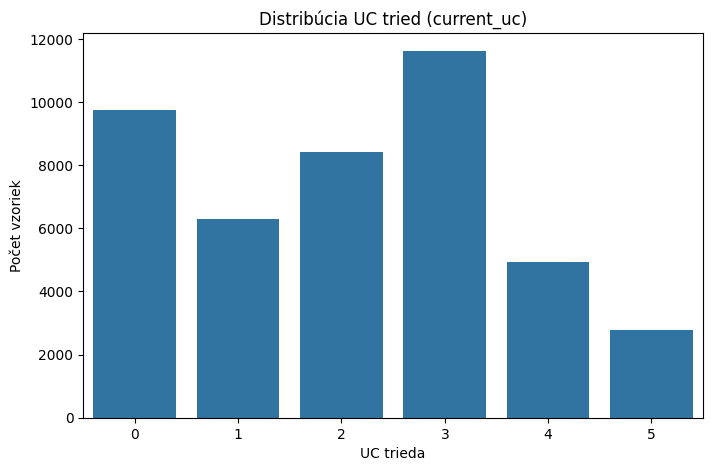

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='current_uc', data=data)
plt.title("Distribúcia UC tried (current_uc)")
plt.xlabel("UC trieda")
plt.ylabel("Počet vzoriek")
plt.show()

<div class="alert alert-block alert-warning">
<b>Rozdelenie UC:</b> Treba brať do úvahy, že niektoré používateľské prípady (UC) sa v datasete vyskytujú častejšie ako iné.
</div>

In [13]:
# Váhy tried pre nevyvážené triedy
classes = np.unique(data['current_uc'])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=data['current_uc'])
class_weights = dict(zip(classes, weights))
print("Váhy:", class_weights)

Váhy: {np.int64(0): np.float64(0.7482749197239872), np.int64(1): np.float64(1.1597310461668784), np.int64(2): np.float64(0.867078335906266), np.int64(3): np.float64(0.6284247066586338), np.int64(4): np.float64(1.475382232100761), np.int64(5): np.float64(2.638838694133237)}


In [14]:
# Uložíme váhy do súboru
class_weights_serializable = {int(k): float(v) for k, v in class_weights.items()}
with open('class_weights.json', 'w') as f:
    json.dump(class_weights_serializable, f)

<div class="alert alert-block alert-success">
<b>Rozdelenie UC:</b> Tento problém je možné vyriešiť pomocou váženého priemeru.
</div>

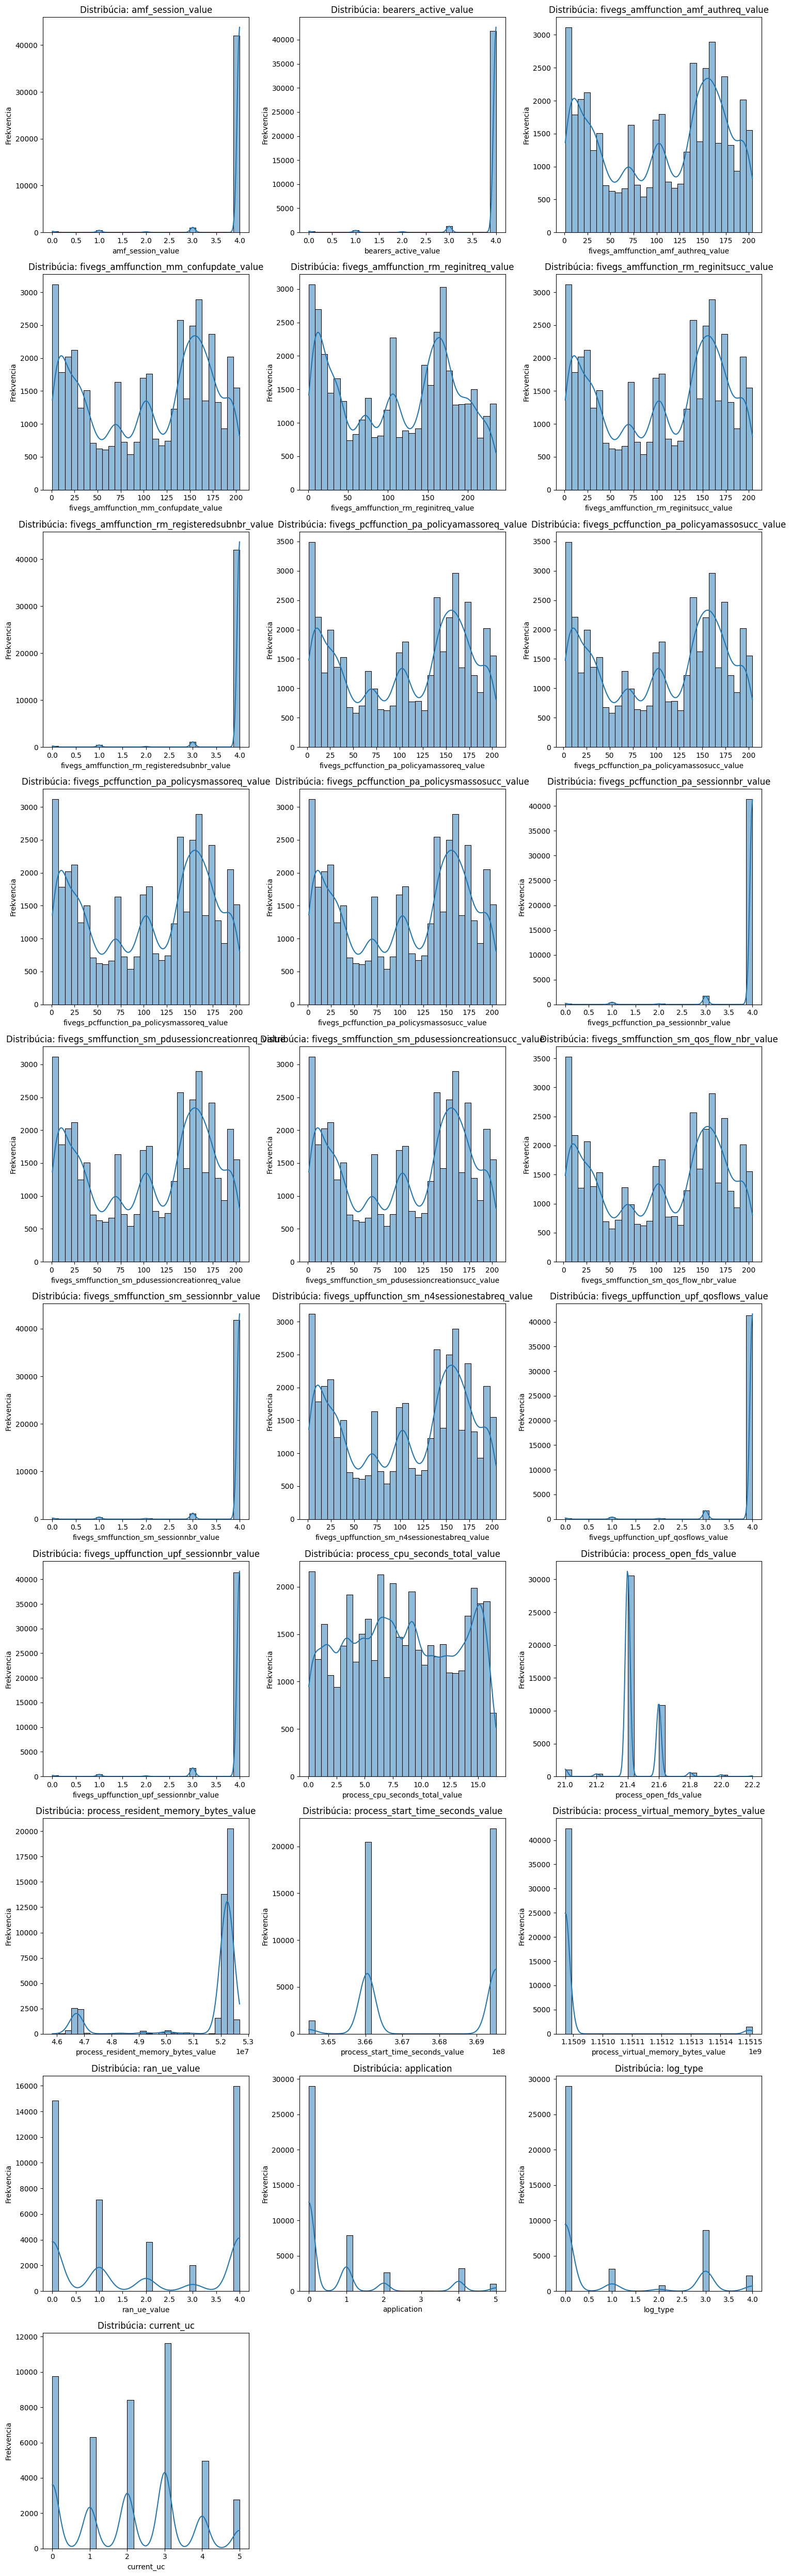

In [15]:
# Vyberieme číselné stĺpce
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))


axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  # Histogram
  sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
  axes[i].set_title(f'Distribúcia: {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frekvencia')

# Odstránime prázdne osy
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


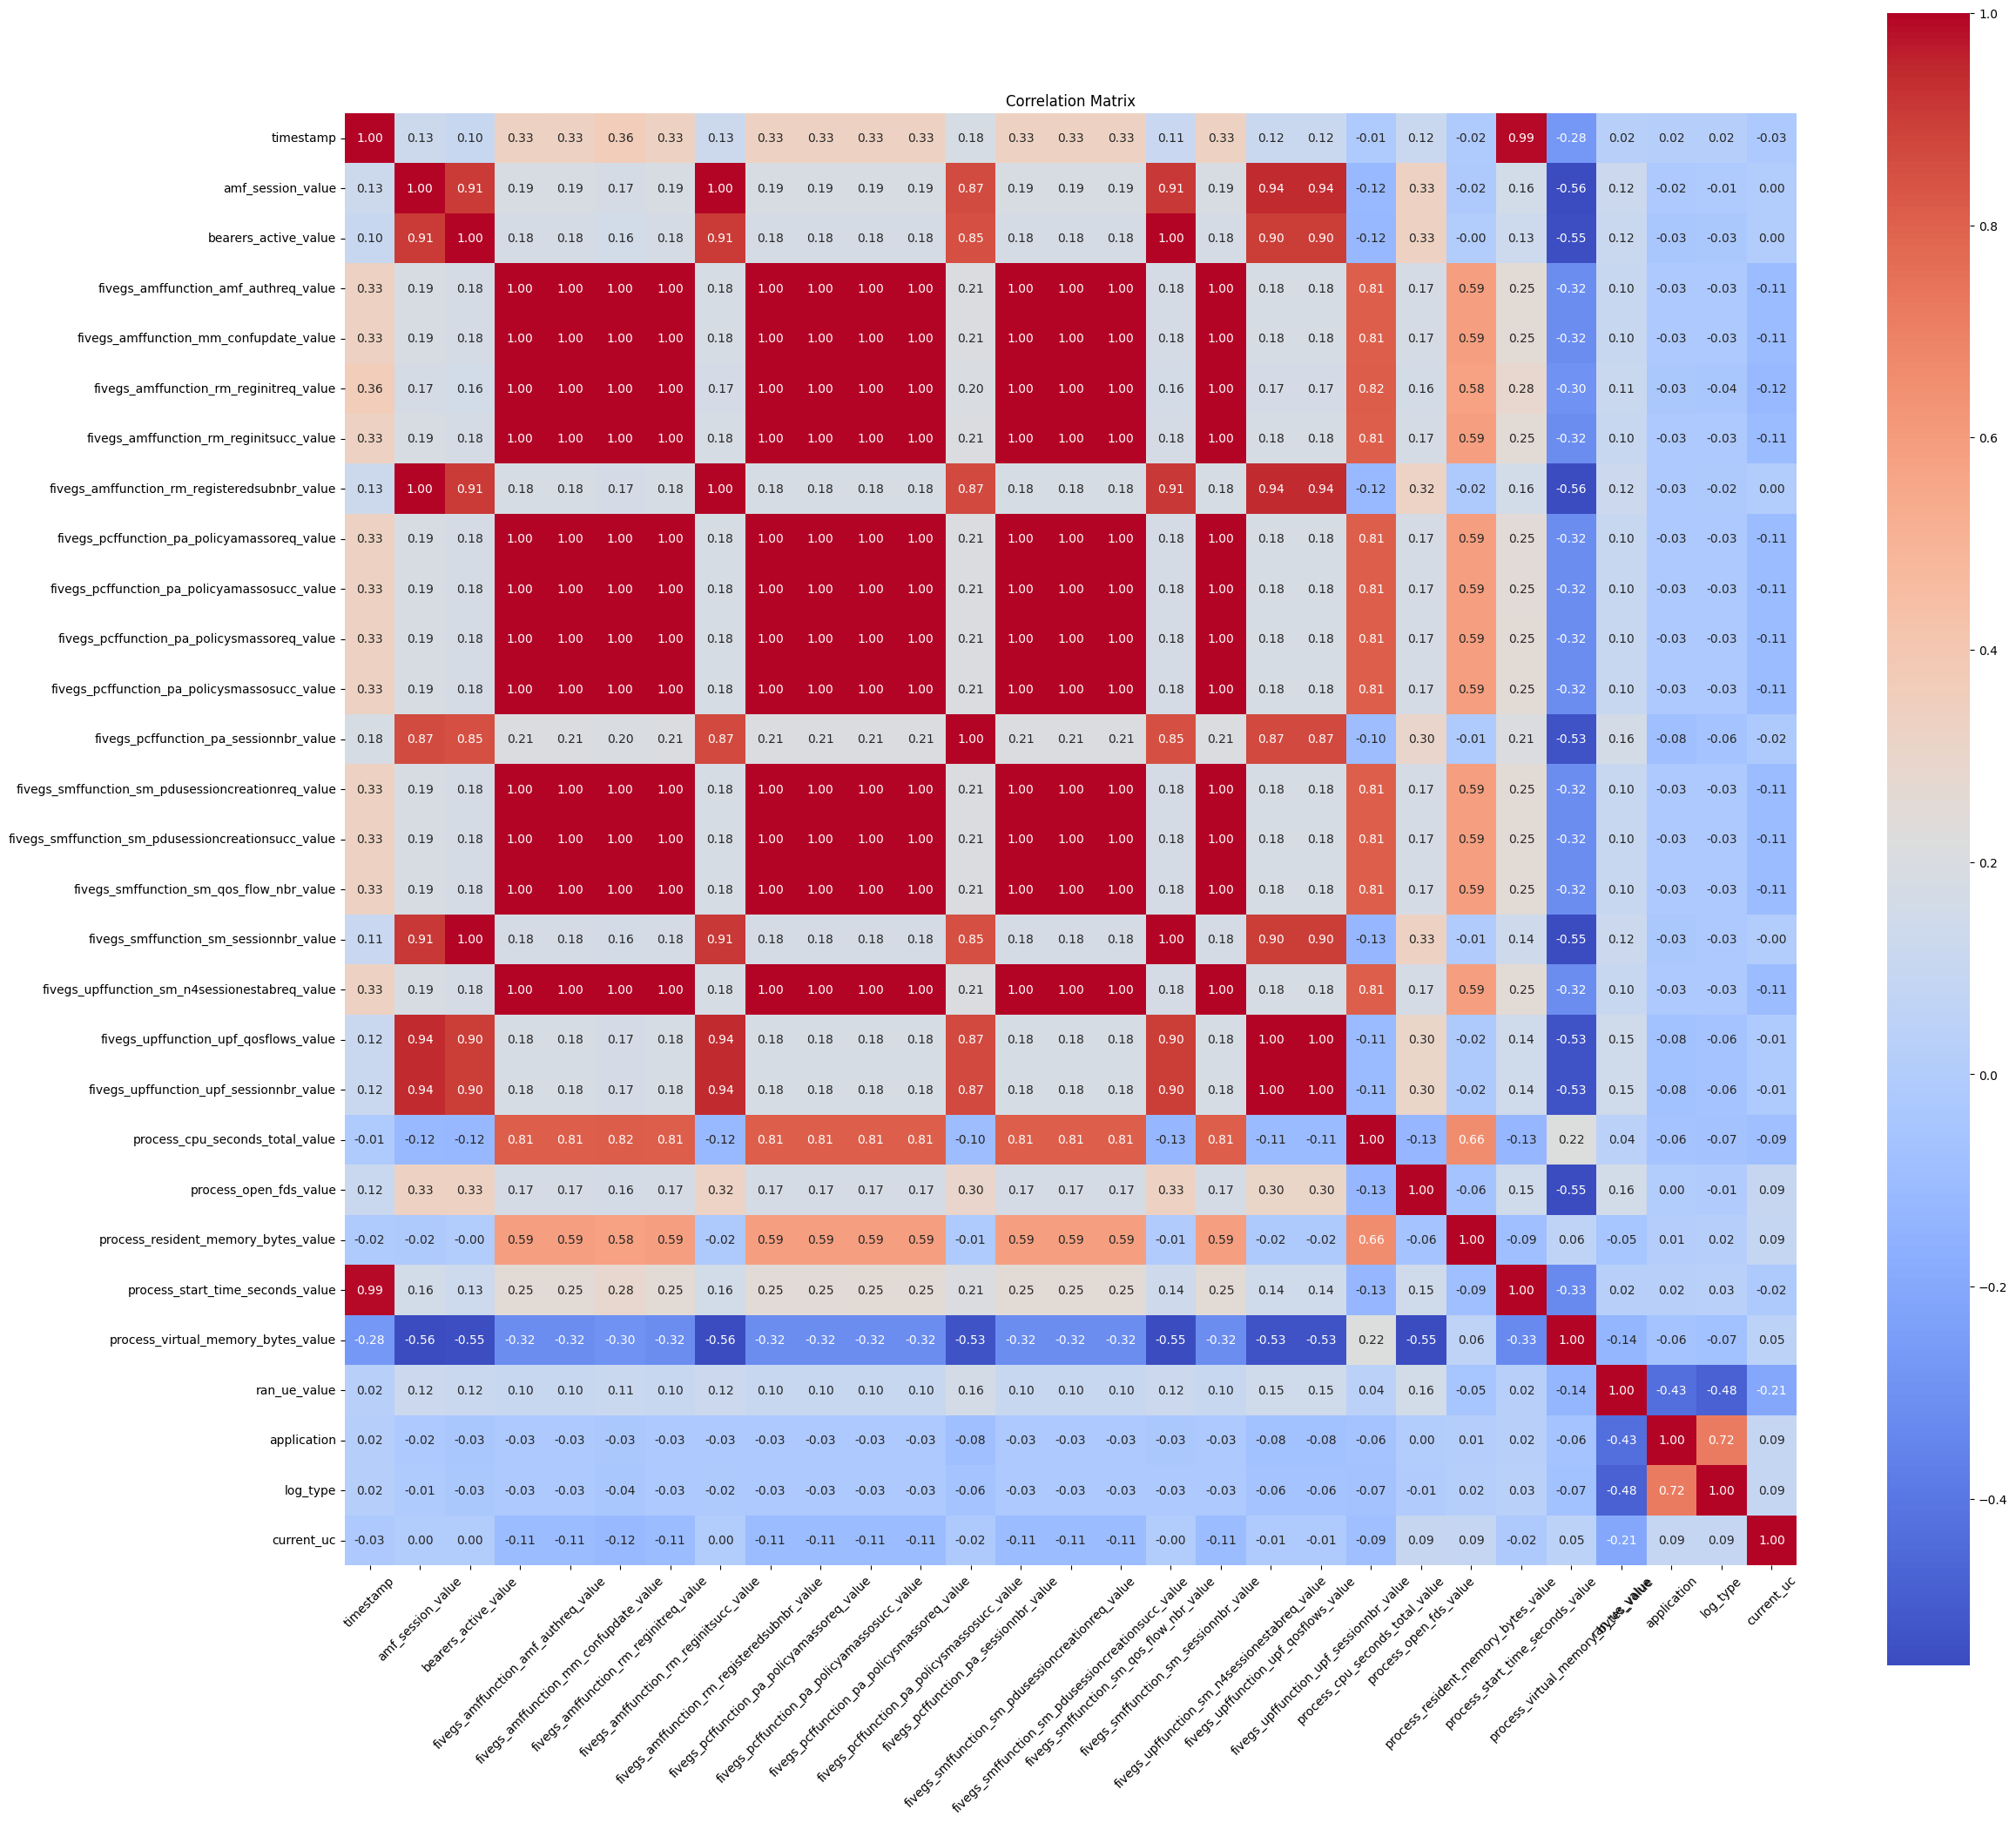

In [16]:
# Korelačná matica
corr = data.corr()


plt.figure(figsize=(25, 25))
plt.title("Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
corr

timestamp  \
timestamp                                            1.000000   
amf_session_value                                    0.126430   
bearers_active_value                                 0.104342   
fivegs_amffunction_amf_authreq_value                 0.330924   
fivegs_amffunction_mm_confupdate_value               0.330871   
fivegs_amffunction_rm_reginitreq_value               0.363101   
fivegs_amffunction_rm_reginitsucc_value              0.330872   
fivegs_amffunction_rm_registeredsubnbr_value         0.126227   
fivegs_pcffunction_pa_policyamassoreq_value          0.330239   
fivegs_pcffunction_pa_policyamassosucc_value         0.330253   
fivegs_pcffunction_pa_policysmassoreq_value          0.330520   
fivegs_pcffunction_pa_policysmassosucc_value         0.330521   
fivegs_pcffunction_pa_sessionnbr_value               0.183344   
fivegs_smffunction_sm_pdusessioncreationreq_value    0.330717   
fivegs_smffunction_sm_pdusessioncreationsucc_value   0.330716   
fivegs_smffunction_sm_qos_flow_nbr_value             0.330732   
fivegs_smffunction_sm_sessionnbr_value               0.108243   
fivegs_upffunction_sm_n4sessionestabreq_value        0.330828   
fivegs_upffunction_upf_qosflows_value                0.115644   
fivegs_upffunction_upf_sessionnbr_value              0.115644   
process_cpu_seconds_total_value                     -0.013769   
process_open_fds_value                               0.115422   
process_resident_memory_bytes_value                 -0.015021   
process_start_time_seconds_value                     0.993190   
process_virtual_memory_bytes_value                  -0.275011   
ran_ue_value                                         0.023268   
application                                          0.015865   
log_type                                             0.019038   
current_uc                                          -0.025613   

                                                    amf_session_value  \
timestamp                                                    0.126430   
amf_session_value                                            1.000000   
bearers_active_value                                         0.908254   
fivegs_amffunction_amf_authreq_value                         0.185963   
fivegs_amffunction_mm_confupdate_value                       0.186602   
fivegs_amffunction_rm_reginitreq_value                       0.174282   
fivegs_amffunction_rm_reginitsucc_value                      0.186602   
fivegs_amffunction_rm_registeredsubnbr_value                 0.997086   
fivegs_pcffunction_pa_policyamassoreq_value                  0.186233   
fivegs_pcffunction_pa_policyamassosucc_value                 0.186275   
fivegs_pcffunction_pa_policysmassoreq_value                  0.186407   
fivegs_pcffunction_pa_policysmassosucc_value                 0.186407   
fivegs_pcffunction_pa_sessionnbr_value                       0.865731   
fivegs_smffunction_sm_pdusessioncreationreq_value            0.186726   
fivegs_smffunction_sm_pdusessioncreationsucc_value           0.186726   
fivegs_smffunction_sm_qos_flow_nbr_value                     0.186602   
fivegs_smffunction_sm_sessionnbr_value                       0.911614   
fivegs_upffunction_sm_n4sessionestabreq_value                0.186474   
fivegs_upffunction_upf_qosflows_value                        0.941222   
fivegs_upffunction_upf_sessionnbr_value                      0.941222   
process_cpu_seconds_total_value                             -0.117396   
process_open_fds_value                                       0.327545   
process_resident_memory_bytes_value                         -0.016386   
process_start_time_seconds_value                             0.155921   
process_virtual_memory_bytes_value                          -0.557193   
ran_ue_value                                                 0.119246   
application                                                 -0.022082   
log_type                                                 

<div class="alert alert-block alert-warning">
<b>Korelácia:</b> Žiadna metrika nemá silnú koreláciu s UC triedou, ktorú budeme klasifikovať.
</div>

 ➡️ Záver: žiadna metrika nemá silnú lineárnu koreláciu s UC triedou – čo je očakávané, keďže ide o ne-lineárne časové procesy.
 Avšak to neznamená, že tieto metriky sú zbytočné. Skôr naznačuje, že lineárne modely by zlyhali, ale LSTM a DNN modely môžu tieto vzory stále zachytiť. <a class="anchor" id="4"></a>

## Dataset z reálnej premávky <a class="anchor" id="Realdatadataset"></a>

In [18]:
real_data = pd.read_csv("../real_data.csv")
real_data.head()

timestamp  amf_session_value  bearers_active_value  \
0  2025-04-10 12:28:14                2.0                   2.0   
1  2025-04-10 12:28:15                2.0                   2.0   
2  2025-04-10 12:28:16                2.0                   2.0   
3  2025-04-10 12:28:17                2.0                   2.0   
4  2025-04-10 12:28:18                2.0                   2.0   

   fivegs_amffunction_amf_authreject_value  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   fivegs_amffunction_amf_authreq_value  \
0                                  10.0   
1                                  10.0   
2                                  10.0   
3                                  10.0   
4                                  10.0   

   fivegs_amffunction_mm_confupdate_value  \
0                                   599.0   
1                                   599.0   
2                                   599.0   
3                                   599.0   
4                                   599.0   

   fivegs_amffunction_mm_confupdatesucc_value  \
0                                       499.0   
1                                       499.0   
2                                       499.0   
3                                       499.0   
4                                       499.0   

   fivegs_amffunction_mm_paging5greq_value  \
0                                   1034.0   
1                                   1034.0   
2                                   1034.0   
3                                   1034.0   
4                                   1034.0   

   fivegs_amffunction_mm_paging5gsucc_value  \
0                                     498.0   
1                                     498.0   
2                                     498.0   
3                                     498.0   
4                                     498.0   

   fivegs_amffunction_rm_regemergreq_value  ...  \
0                                      0.0  ...   
1                                      0.0  ...   
2                                      0.0  ...   
3                                      0.0  ...   
4                                      0.0  ...   

   process_resident_memory_bytes_value  process_start_time_seconds_value  \
0                           50106368.0                       118464611.5   
1                           50106368.0                       118464611.5   
2                           50106368.0                       118464611.5   
3                           50106368.0                       118464611.5   
4                           50106368.0                       118464611.5   

   process_virtual_memory_bytes_value  process_virtual_memory_max_bytes_value  \
0                        1.404078e+09                                    -1.0   
1                        1.404078e+09                                    -1.0   
2                        1.404078e+09                                    -1.0   
3                        1.404078e+09                                    -1.0   
4                        1.404078e+09                                    -1.0   

   ran_ue_value  s5c_rx_createsession_value  s5c_rx_parse_failed_value  \
0           0.0                         0.0                        0.0   
1           0.0                         0.0                        0.0   
2           0.0                         0.0                        0.0   
3           0.0                         0.0                        0.0   
4           0.0                         0.0                        0.0   

   application  log_type  current_uc  
0            0         0         uc1  
1            0         0         uc1  
2            0         0         uc1  
3            0         0         uc1  
4            0         0         uc1  

[5 rows x 58 colu

#### Chýbajúce hodnoty, Dátové typy, Duplikáty a Deskriptívna štatistika <a class="anchor" id="5"></a>

In [19]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   timestamp                                           6785 non-null   object 
 1   amf_session_value                                   6785 non-null   float64
 2   bearers_active_value                                6785 non-null   float64
 3   fivegs_amffunction_amf_authreject_value             6785 non-null   float64
 4   fivegs_amffunction_amf_authreq_value                6785 non-null   float64
 5   fivegs_amffunction_mm_confupdate_value              6785 non-null   float64
 6   fivegs_amffunction_mm_confupdatesucc_value          6785 non-null   float64
 7   fivegs_amffunction_mm_paging5greq_value             6785 non-null   float64
 8   fivegs_amffunction_mm_paging5gsucc_value            6785 non-null   float64
 9

In [20]:
real_data.describe(include='all')

timestamp  amf_session_value  bearers_active_value  \
count                  6785        6785.000000           6785.000000   
unique                 5084                NaN                   NaN   
top     2025-04-10 13:20:34                NaN                   NaN   
freq                      9                NaN                   NaN   
mean                    NaN           2.791452              2.766839   
std                     NaN           1.494975              1.526840   
min                     NaN           0.000000              0.000000   
25%                     NaN           1.000000              1.000000   
50%                     NaN           4.000000              4.000000   
75%                     NaN           4.000000              4.000000   
max                     NaN           4.000000              4.000000   

        fivegs_amffunction_amf_authreject_value  \
count                                    6785.0   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

        fivegs_amffunction_amf_authreq_value  \
count                            6785.000000   
unique                                   NaN   
top                                      NaN   
freq                                     NaN   
mean                               12.206338   
std                                 2.765957   
min                                 0.000000   
25%                                12.000000   
50%                                12.000000   
75%                                12.000000   
max                                15.000000   

        fivegs_amffunction_mm_confupdate_value  \
count                              6785.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                734.754901   
std                                 282.378079   
min                                   0.000000   
25%                                 618.000000   
50%                                 633.000000   
75%                                 640.000000   
max                                1211.000000   

        fivegs_amffunction_mm_confupdatesucc_value  \
count                                  6785.000000   
unique                                         NaN   
top                                            NaN   
freq                                           NaN   
mean                                    531.113780   
std                                     125.164509   
min                                       0.000000   
25%                                     506.000000   
50%                                     521.000000   
75%                                     527.000000   
max                                     671.000000   

        fivegs_amffunction_mm_paging5greq_value  \
count                               6785.000000   
unique                                      NaN   
top                                         NaN   
freq                                        NaN   
mean                                1096.827119   
std                                  256.344911   
min                                    0.000000   
25%                                 1048.000000   
50%                                 1078.000000   
75%                                 1090.000000   
max                                 1378.000000   

        fivegs_amffunction_mm_paging5gsucc_value  \
count                                6785.000000

In [21]:
real_data.isnull().sum()[real_data.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
real_data.nunique()[real_data.nunique() > 1].apply(lambda x: f"{x:<50}{real_data.nunique()[real_data.nunique() > 1].index[real_data.nunique()[real_data.nunique() > 1] == x][0]}")

timestamp                                             5084                                          ...
amf_session_value                                     5                                             ...
bearers_active_value                                  5                                             ...
fivegs_amffunction_amf_authreq_value                  4                                             ...
fivegs_amffunction_mm_confupdate_value                31                                            ...
fivegs_amffunction_mm_confupdatesucc_value            27                                            ...
fivegs_amffunction_mm_paging5greq_value               27                                            ...
fivegs_amffunction_mm_paging5gsucc_value              26                                            ...
fivegs_amffunction_rm_reginitreq_value                9                                             ...
fivegs_amffunction_rm_reginitsucc_value               5         

In [23]:
duplicates = real_data.duplicated()
duplicates_sum = duplicates.sum()
print(f"Total duplicates: {duplicates_sum}")

Total duplicates: 0


<div class="alert alert-block alert-info">
<b>Dáta:</b> V reálnych dátach sa nevyskytujú žiadne chýbajúce hodnoty ani duplikáty.
</div>

#### Záver <a class="anchor" id="8"></a>
Čo treba zodpovedať:
1. Chýbajúce hodnoty: 
   - Koľko chýbajúcich hodnôt je v každom stĺpci?
      - Žiadne chýbajúce hodnoty

2. Dátové typy:
   - Aké sú dátové typy každého stĺpca?
      - timestamp                                              object
      - application                                            object
      - log_type                                               object
      - current_uc                                             object
      - Ostatné stĺpce sú float64
   - Ako konvertovať dátové typy?
      - Map the columns to the correct data types using the `astype()` method
      - Použite `astype()` na konverziu stĺpcov na správne dátové typy.

3. Duplikáty:
   - Aké sú duplicitné stĺpce v datasete?
      - V datasete nie sú žiadne duplicitné stĺpce. 
    - Koľko duplicitných riadkov je v datasete?
      - 0

#### Príprava dát <a class="anchor" id="7"></a>

In [24]:
# Stĺpce s iba jednou unikátnou hodnotou odstánime
real_data = real_data.loc[:, real_data.nunique() > 1]

In [25]:
# Chýbajúce hodnoty nahradíme módom pre numerické stĺpce
real_data.fillna(real_data.mode().iloc[0], inplace=True)

# Skontrolujeme chýbajúce hodnoty znova
real_data.isnull().sum()[real_data.isnull().sum() > 0]

Series([], dtype: int64)

In [26]:
# Konvertujeme timestamp na datetime
real_data['timestamp'] = pd.to_datetime(real_data['timestamp'])

real_data['application'] = real_data['application'].map(APP_MAP)
real_data['log_type'] = real_data['log_type'].map(LOG_MAP)
real_data['current_uc'] = real_data['current_uc'].map(UC_MAP)

# Skontrolujeme, či sme správne namapovali hodnoty
real_data.dtypes

timestamp                                             datetime64[ns]
amf_session_value                                            float64
bearers_active_value                                         float64
fivegs_amffunction_amf_authreq_value                         float64
fivegs_amffunction_mm_confupdate_value                       float64
fivegs_amffunction_mm_confupdatesucc_value                   float64
fivegs_amffunction_mm_paging5greq_value                      float64
fivegs_amffunction_mm_paging5gsucc_value                     float64
fivegs_amffunction_rm_reginitreq_value                       float64
fivegs_amffunction_rm_reginitsucc_value                      float64
fivegs_amffunction_rm_registeredsubnbr_value                 float64
fivegs_amffunction_rm_regmobreq_value                        float64
fivegs_amffunction_rm_regmobsucc_value                       float64
fivegs_amffunction_rm_regperiodreq_value                     float64
fivegs_amffunction_rm_regperiodsuc

<div class="alert alert-block alert-success">
<b>Dátové typy:</b> Všetky stĺpce boli konvertované na správne dátové typy ('float64', 'int64', 'datetime64[ns]').
</div>

#### Vizualizácia dát <a class="anchor" id="6"></a>

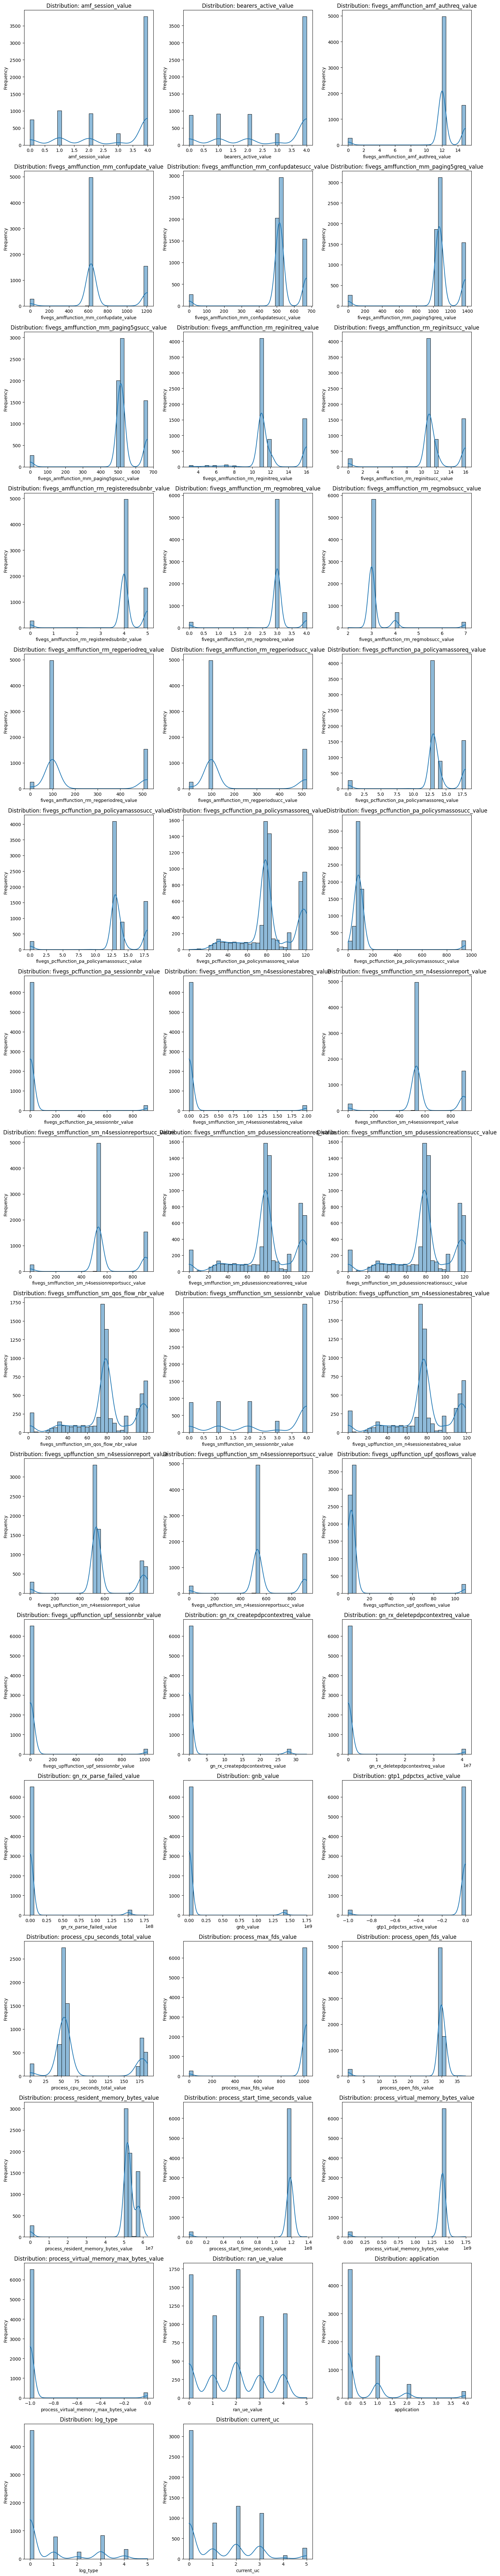

In [27]:
# Vyberieme číselné stĺpce
numerical_cols = real_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  # Histogram
  sns.histplot(real_data[col], kde=True, bins=30, ax=axes[i])
  axes[i].set_title(f'Distribution: {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Odstránime prázdne osy
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

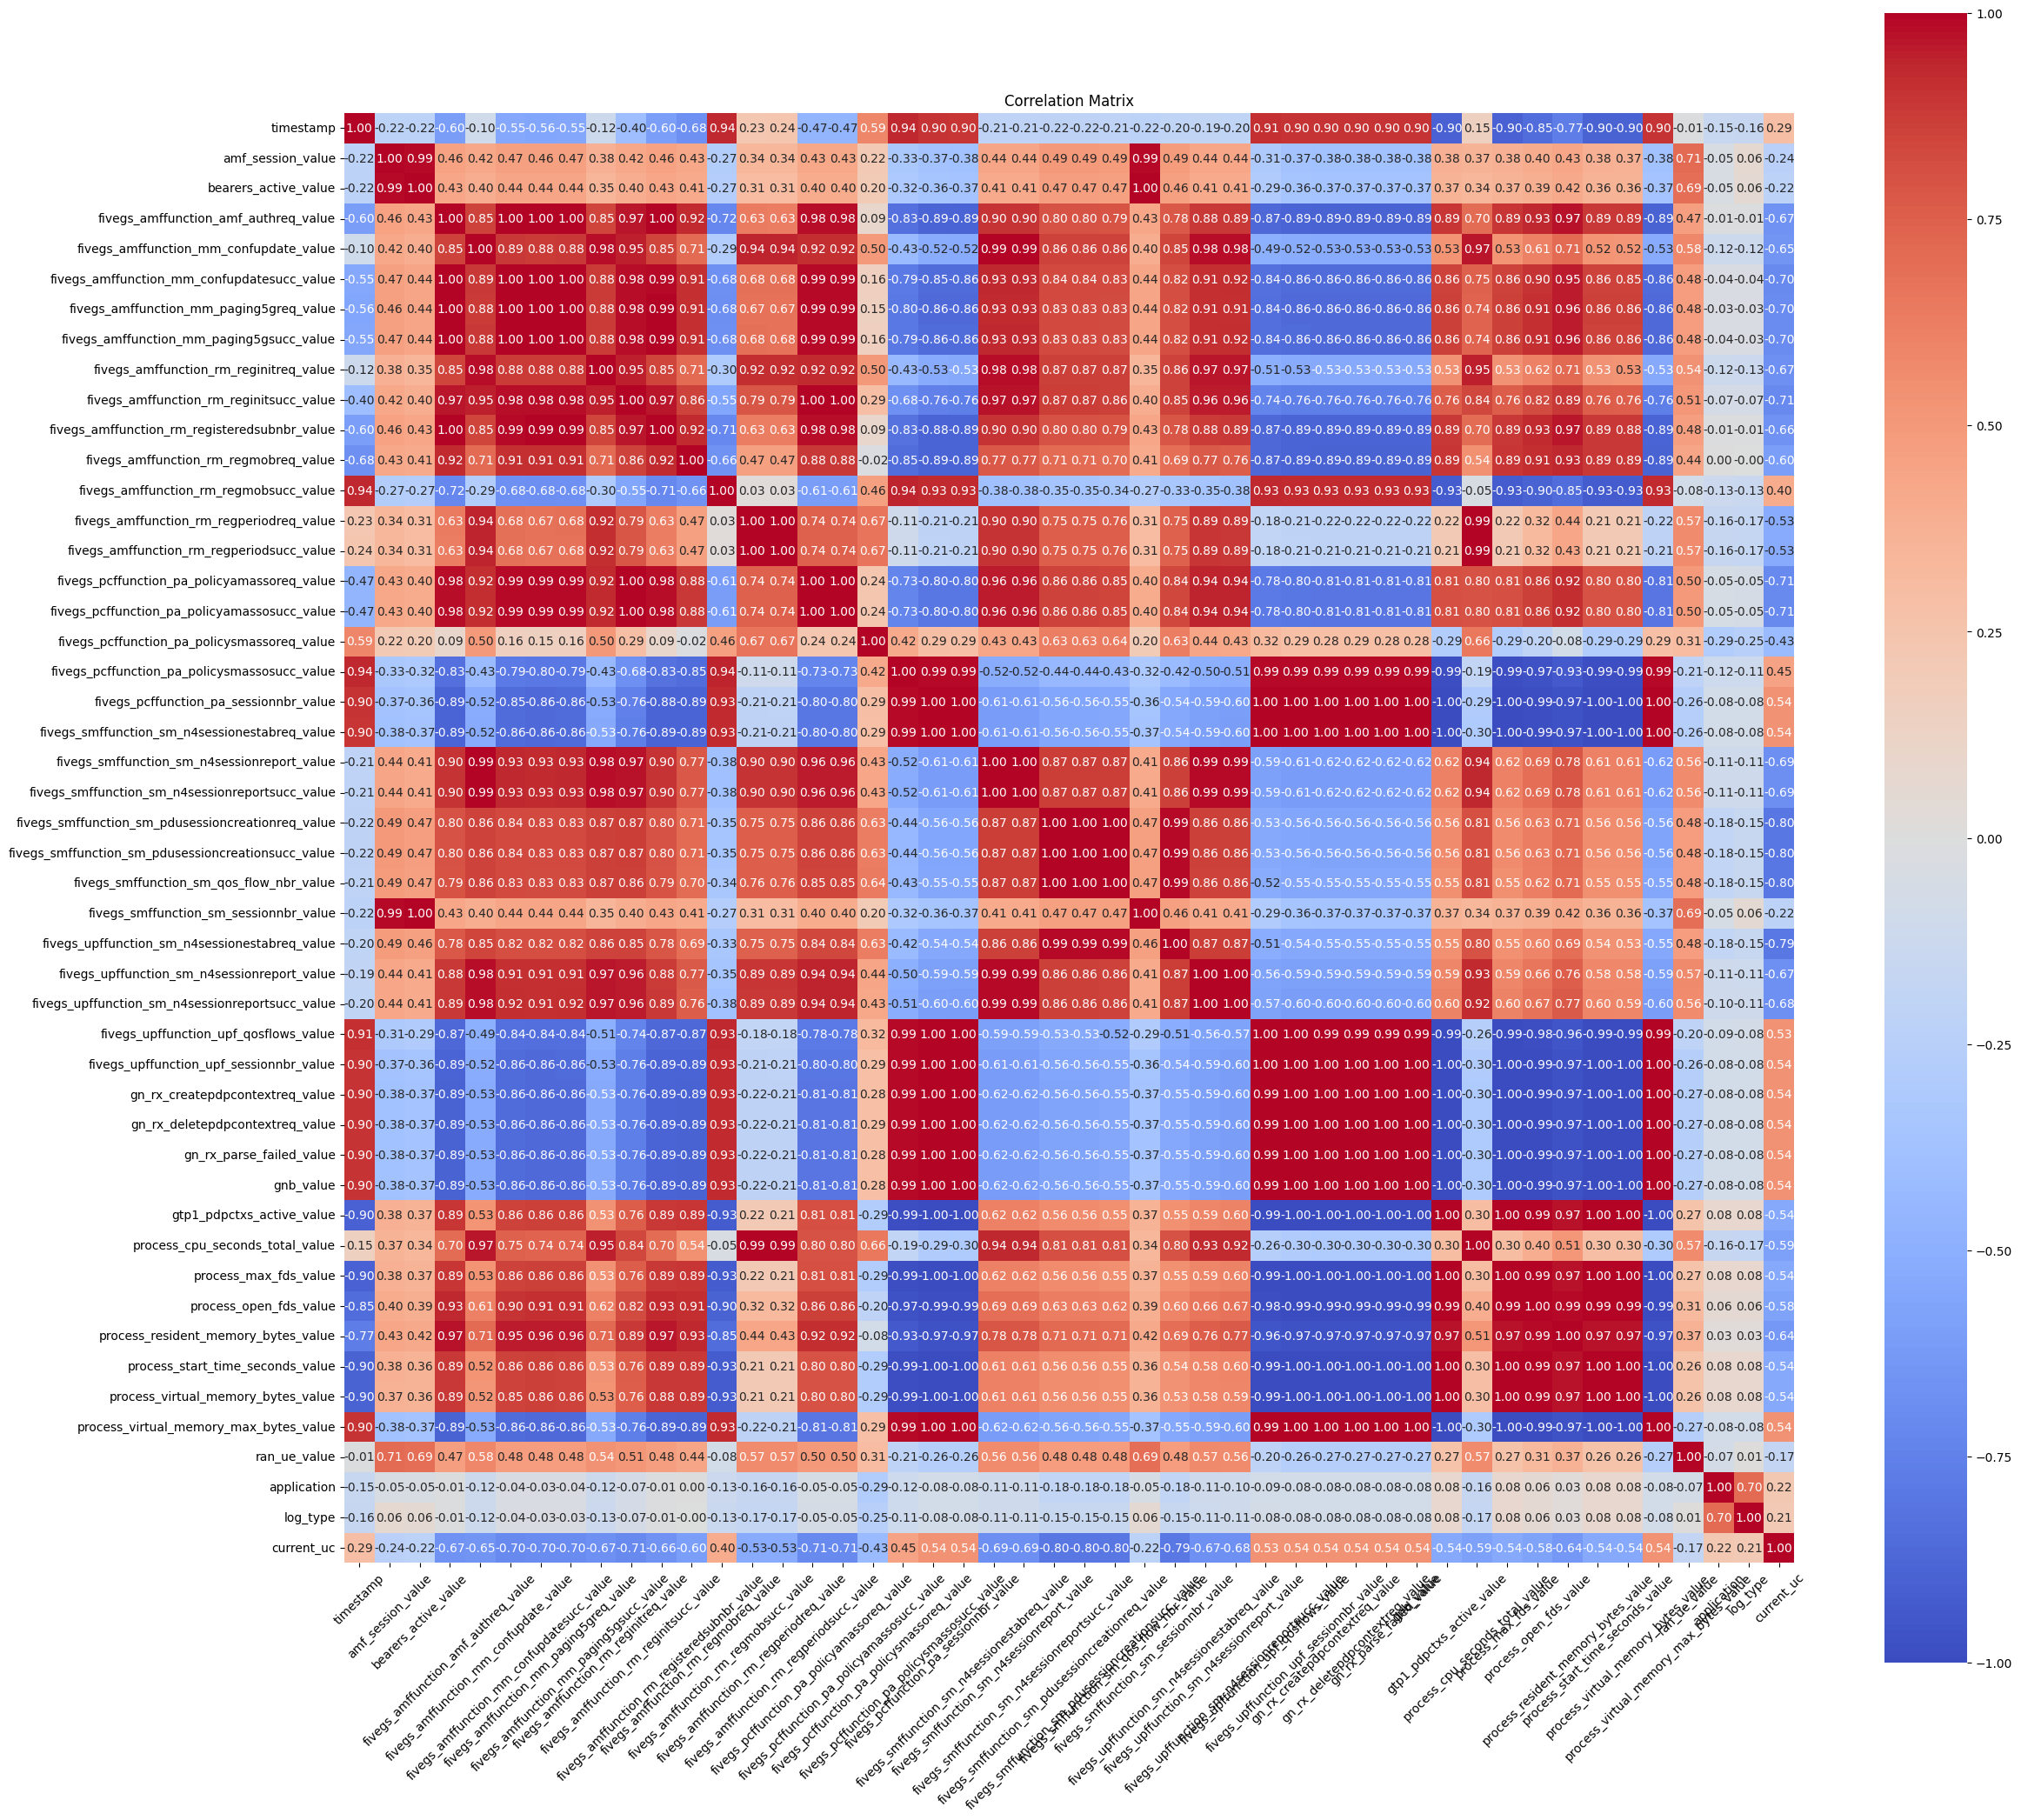

In [28]:
# Korelačná matica
corr = real_data.corr()

plt.figure(figsize=(25, 25))
plt.title("Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
corr

timestamp  \
timestamp                                            1.000000   
amf_session_value                                   -0.223178   
bearers_active_value                                -0.224878   
fivegs_amffunction_amf_authreq_value                -0.603266   
fivegs_amffunction_mm_confupdate_value              -0.099720   
fivegs_amffunction_mm_confupdatesucc_value          -0.545746   
fivegs_amffunction_mm_paging5greq_value             -0.557451   
fivegs_amffunction_mm_paging5gsucc_value            -0.550400   
fivegs_amffunction_rm_reginitreq_value              -0.117349   
fivegs_amffunction_rm_reginitsucc_value             -0.402261   
fivegs_amffunction_rm_registeredsubnbr_value        -0.599111   
fivegs_amffunction_rm_regmobreq_value               -0.677268   
fivegs_amffunction_rm_regmobsucc_value               0.936476   
fivegs_amffunction_rm_regperiodreq_value             0.234188   
fivegs_amffunction_rm_regperiodsucc_value            0.235223   
fivegs_pcffunction_pa_policyamassoreq_value         -0.467473   
fivegs_pcffunction_pa_policyamassosucc_value        -0.467473   
fivegs_pcffunction_pa_policysmassoreq_value          0.590511   
fivegs_pcffunction_pa_policysmassosucc_value         0.936625   
fivegs_pcffunction_pa_sessionnbr_value               0.898757   
fivegs_smffunction_sm_n4sessionestabreq_value        0.897113   
fivegs_smffunction_sm_n4sessionreport_value         -0.208522   
fivegs_smffunction_sm_n4sessionreportsucc_value     -0.208522   
fivegs_smffunction_sm_pdusessioncreationreq_value   -0.218083   
fivegs_smffunction_sm_pdusessioncreationsucc_value  -0.218086   
fivegs_smffunction_sm_qos_flow_nbr_value            -0.207479   
fivegs_smffunction_sm_sessionnbr_value              -0.224622   
fivegs_upffunction_sm_n4sessionestabreq_value       -0.202399   
fivegs_upffunction_sm_n4sessionreport_value         -0.188556   
fivegs_upffunction_sm_n4sessionreportsucc_value     -0.202671   
fivegs_upffunction_upf_qosflows_value                0.908550   
fivegs_upffunction_upf_sessionnbr_value              0.900357   
gn_rx_createpdpcontextreq_value                      0.898810   
gn_rx_deletepdpcontextreq_value                      0.898872   
gn_rx_parse_failed_value                             0.898804   
gnb_value                                            0.898768   
gtp1_pdpctxs_active_value                           -0.898873   
process_cpu_seconds_total_value                      0.149651   
process_max_fds_value                               -0.898873   
process_open_fds_value                              -0.846445   
process_resident_memory_bytes_value                 -0.772016   
process_start_time_seconds_value                    -0.898247   
process_virtual_memory_bytes_value                  -0.897043   
process_virtual_memory_max_bytes_value               0.898873   
ran_ue_value                                        -0.012096   
application                                         -0.154390   
log_type                                            -0.156362   
current_uc                                           0.291725   

                                                    amf_session_value  \
timestamp                                                   -0.223178   
amf_session_value                                            1.000000   
bearers_active_value                                         0.989151   
fivegs_amffunction_amf_authreq_value                         0.455223   
fivegs_amffunction_mm_confupdate_value                       0.424537   
fivegs_amffunction_mm_confupdatesucc_value                   0.465609   
fivegs_amffunction_mm_paging5greq_value                      0.464999   
fivegs_amffunction_mm_paging5gsucc_value                     0.465160   
fivegs_amffunction_rm_reginitreq_value                       0.376650   
fivegs_amffunction_rm_reginitsucc_value                      0.423287   
fivegs_amffunction_rm_registeredsubnbr_value                 0.

<div class="alert alert-block alert-warning">
<b>Korelácia:</b> Narozdiel od syntetických dát, v reálnych dátach je silná korelácia medzi niektorými metrikami a UC triedou.
</div>

## Výber metrík <a class="anchor" id="feature_selecion"></a>

In [30]:
data = pd.read_csv("../synthetic_data.csv")
real_data = pd.read_csv("../real_data.csv") 

In [31]:
def preprocess_data(data):
    data.fillna(data.mode().iloc[0], inplace=True)

    data['application'] = data['application'].map(APP_MAP)
    data['log_type'] = data['log_type'].map(LOG_MAP)
    data['current_uc'] = data['current_uc'].map(UC_MAP)

    # Vyberieme číselné stĺpce
    X = data.drop(columns=['timestamp', 'current_uc'], errors='ignore')
    X = X.select_dtypes(include=[np.number])
    y = data['current_uc'].astype(int)

    # Normalizácia dát
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, X, y

In [32]:
def base_estimator(X_scaled, X, y):
  # Základný estimátor
  rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

  # Fitneme model
  rf.fit(X_scaled, y)
  rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

  return rf_importances, rf

In [33]:
def RFE_def(X_scaled, y, X, rf):
  # Recursive Feature Elimination - Rekurzívne vyraďovanie vlastností
  rfe = RFE(estimator=rf, n_features_to_select=10)
  rfe.fit(X_scaled, y)
  rfe_selected = pd.Series(rfe.support_, index=X.columns)

  return rfe_selected

In [34]:
def RFECV_def(X_scaled, y, X, rf):
  # Recursive Feature Elimination with Cross-Validation - Rekurzívne vyraďovanie vlastností s krížovou validáciou
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='f1_weighted', n_jobs=-1)
  rfecv.fit(X_scaled, y)
  rfecv_selected = pd.Series(rfecv.support_, index=X.columns)

  return rfecv_selected

In [35]:
def SFSX_def(X_scaled, y, X, rf):
  # Sequential Feature Selector - Sekvenčné vyberanie vlastností
  sfs = SequentialFeatureSelector(rf, n_features_to_select=10, direction='forward', scoring='f1_weighted', cv=5, n_jobs=-1)
  sfs.fit(X_scaled, y)
  sfs_selected = pd.Series(sfs.get_support(), index=X.columns)

  return sfs_selected

In [36]:
X_scaled, X, y = preprocess_data(data)


rf_importances, rf = base_estimator(X_scaled, X, y)
rfe_selected = RFE_def(X_scaled, y, X, rf)
rfecv_selected = RFECV_def(X_scaled, y, X, rf)
sfs_selected = SFSX_def(X_scaled, y, X, rf)

# Komplexný prehľad
summary_df = pd.DataFrame({
    'Feature': X.columns,
    'RF_Importance': rf_importances,
    'Selected_RFE': rfe_selected,
    'Selected_RFECV': rfecv_selected,
    'Selected_SFS': sfs_selected
}).sort_values(by='RF_Importance', ascending=False)

summary_df

Feature  \
process_cpu_seconds_total_value                                                process_open_fds_value   
ran_ue_value                                                                s5c_rx_parse_failed_value   
fivegs_amffunction_rm_reginitreq_value                        fivegs_amffunction_rm_reginitsucc_value   
process_resident_memory_bytes_value                                process_virtual_memory_bytes_value   
fivegs_amffunction_amf_authreq_value                           fivegs_amffunction_mm_confupdate_value   
fivegs_upffunction_sm_n4sessionestabreq_value             fivegs_upffunction_sm_n4sessionreport_value   
fivegs_amffunction_mm_confupdate_value                     fivegs_amffunction_mm_confupdatesucc_value   
fivegs_smffunction_sm_pdusessioncreationsucc_value           fivegs_smffunction_sm_qos_flow_nbr_value   
fivegs_pcffunction_pa_policyamassoreq_value              fivegs_pcffunction_pa_policyamassosucc_value   
fivegs_amffunction_rm_reginitsucc_value                  fivegs_amffunction_rm_registeredsubnbr_value   
fivegs_smffunction_sm_pdusessioncreationreq_value   fivegs_smffunction_sm_pdusessioncreationsucc_v...   
fivegs_pcffunction_pa_policyamassosucc_value              fivegs_pcffunction_pa_policysmassoreq_value   
process_start_time_seconds_value                               process_virtual_memory_max_bytes_value   
fivegs_pcffunction_pa_policysmassoreq_value              fivegs_pcffunction_pa_policysmassosucc_value   
fivegs_pcffunction_pa_policysmassosucc_value                   fivegs_pcffunction_pa_sessionnbr_value   
fivegs_smffunction_sm_qos_flow_nbr_value                       fivegs_smffunction_sm_sessionnbr_value   
log_type                                                                        process_max_fds_value   
application                                                                      bearers_active_value   
process_open_fds_value                                               process_start_time_seconds_value   
process_virtual_memory_bytes_value                                                       ran_ue_value   
fivegs_pcffunction_pa_sessionnbr_value                  fivegs_smffunction_sm_n4sessionestabreq_value   
bearers_active_value                                          fivegs_amffunction_amf_authreject_value   
fivegs_upffunction_upf_qosflows_value                         fivegs_upffunction_upf_sessionnbr_value   
fivegs_smffunction_sm_sessionnbr_value                  fivegs_upffunction_sm_n4sessionestabreq_value   
fivegs_upffunction_upf_sessionnbr_value                               gn_rx_createpdpcontextreq_value   
amf_session_value                                                                   amf_session_value   
fivegs_amffunction_rm_registeredsubnbr_value                    fivegs_amffunction_rm_regmobreq_value   
fivegs_smffunction_sm_n4sessionreport_value           fivegs_smffunction_sm_n4sessionreportsucc_value   
fivegs_smffunction_sm_n4sessionreportsucc_value     fivegs_smffunction_sm_pdusessioncreationreq_value   
s5c_rx_createsession_value                                                                application   
fivegs_amffunction_amf_authreject_value                          fivegs_amffunction_amf_authreq_value   
process_virtual_memory_max_bytes_value                                     s5c_rx_createsession_value   
fivegs_amffunction_mm_confupdatesucc_value                    fivegs_amffunction_mm_paging5greq_value   
fivegs_amffunction_mm_paging5greq_value                      fivegs_amffunction_mm_paging5gsucc_value   
fivegs_amffunction_mm_paging5gsucc_value                      fivegs_amffunction_rm_regemergreq_value   
fivegs_amffunction_rm_regemergreq_value                      fivegs_amffunction_rm_regemergsucc_value   
process_max_fds_value                                             process_resident_memory_bytes_value   
fivegs_amffunction_rm_regemergsucc_value                       fivegs_amffunction_rm_reginitreq_value   

In [37]:
X_scaled_real, X_real, y_real = preprocess_data(real_data)

rf_importances_real, rf_real = base_estimator(X_scaled_real, X_real, y_real)
rfe_selected_real = RFE_def(X_scaled_real, y_real, X_real, rf_real)
rfecv_selected_real = RFECV_def(X_scaled_real, y_real, X_real, rf_real)
sfs_selected_real = SFSX_def(X_scaled_real, y_real, X_real, rf_real)

summary_real_df = pd.DataFrame({
    'Feature': X_real.columns,
    'RF_Importance': rf_importances_real,
    'Selected_RFE': rfe_selected_real,
    'Selected_RFECV': rfecv_selected_real,
    'Selected_SFS': sfs_selected_real
}).sort_values(by='RF_Importance', ascending=False)

summary_real_df

Feature  \
process_resident_memory_bytes_value                                process_virtual_memory_bytes_value   
process_cpu_seconds_total_value                                                process_open_fds_value   
fivegs_smffunction_sm_qos_flow_nbr_value                       fivegs_smffunction_sm_sessionnbr_value   
fivegs_smffunction_sm_pdusessioncreationsucc_value           fivegs_smffunction_sm_qos_flow_nbr_value   
fivegs_pcffunction_pa_policysmassoreq_value              fivegs_pcffunction_pa_policysmassosucc_value   
fivegs_smffunction_sm_n4sessionreport_value           fivegs_smffunction_sm_n4sessionreportsucc_value   
fivegs_pcffunction_pa_policysmassosucc_value                   fivegs_pcffunction_pa_sessionnbr_value   
fivegs_amffunction_mm_paging5gsucc_value                      fivegs_amffunction_rm_regemergreq_value   
fivegs_smffunction_sm_n4sessionreportsucc_value     fivegs_smffunction_sm_pdusessioncreationreq_value   
fivegs_smffunction_sm_pdusessioncreationreq_value   fivegs_smffunction_sm_pdusessioncreationsucc_v...   
fivegs_upffunction_sm_n4sessionestabreq_value             fivegs_upffunction_sm_n4sessionreport_value   
fivegs_upffunction_sm_n4sessionreportsucc_value                 fivegs_upffunction_upf_qosflows_value   
fivegs_pcffunction_pa_sessionnbr_value                  fivegs_smffunction_sm_n4sessionestabreq_value   
fivegs_upffunction_sm_n4sessionreport_value           fivegs_upffunction_sm_n4sessionreportsucc_value   
bearers_active_value                                          fivegs_amffunction_amf_authreject_value   
fivegs_upffunction_upf_sessionnbr_value                               gn_rx_createpdpcontextreq_value   
fivegs_amffunction_mm_confupdatesucc_value                    fivegs_amffunction_mm_paging5greq_value   
fivegs_amffunction_mm_confupdate_value                     fivegs_amffunction_mm_confupdatesucc_value   
fivegs_amffunction_mm_paging5greq_value                      fivegs_amffunction_mm_paging5gsucc_value   
fivegs_upffunction_upf_qosflows_value                         fivegs_upffunction_upf_sessionnbr_value   
fivegs_amffunction_rm_reginitsucc_value                  fivegs_amffunction_rm_registeredsubnbr_value   
fivegs_smffunction_sm_sessionnbr_value                  fivegs_upffunction_sm_n4sessionestabreq_value   
fivegs_pcffunction_pa_policyamassosucc_value              fivegs_pcffunction_pa_policysmassoreq_value   
amf_session_value                                                                   amf_session_value   
fivegs_pcffunction_pa_policyamassoreq_value              fivegs_pcffunction_pa_policyamassosucc_value   
fivegs_amffunction_rm_reginitreq_value                        fivegs_amffunction_rm_reginitsucc_value   
ran_ue_value                                                                s5c_rx_parse_failed_value   
fivegs_amffunction_rm_regmobreq_value                          fivegs_amffunction_rm_regmobsucc_value   
fivegs_amffunction_amf_authreq_value                           fivegs_amffunction_mm_confupdate_value   
gn_rx_createpdpcontextreq_value                                       gn_rx_deletepdpcontextreq_value   
fivegs_amffunction_rm_registeredsubnbr_value                    fivegs_amffunction_rm_regmobreq_value   
fivegs_amffunction_rm_regperiodsucc_value                       fivegs_ep_n3_gtp_indatapktn3upf_value   
gn_rx_parse_failed_value                                                                    gnb_value   
application                                                                      bearers_active_value   
fivegs_amffunction_rm_regperiodreq_value                    fivegs_amffunction_rm_regperiodsucc_value   
log_type                                                                        process_max_fds_value   
process_max_fds_value                                             process_resident_memory_bytes_value   
process_virtual_memory_bytes_value                                                       ran_ue_value   

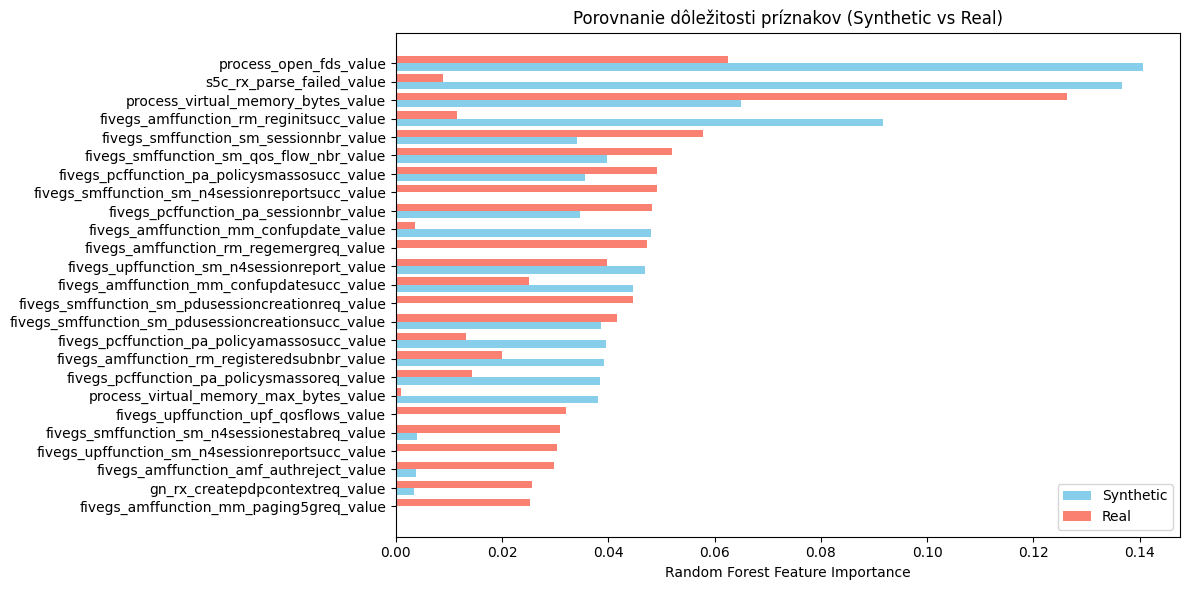

In [38]:
# Načítanie RF dôležitostí
rf_synth = summary_df[['Feature', 'RF_Importance']]
rf_real = summary_real_df[['Feature', 'RF_Importance']] 

# Prejmenuj stĺpce pre merge
rf_synth = rf_synth.rename(columns={'RF_Importance': 'Importance_Synthetic'})
rf_real = rf_real.rename(columns={'RF_Importance': 'Importance_Real'})

# Spojenie oboch DataFrame na základe 'Feature'
merged = pd.merge(rf_synth, rf_real, on='Feature', how='inner')

# Výber top n dôležitých vlastností
top_n = 25
merged['Combined'] = merged[['Importance_Synthetic', 'Importance_Real']].max(axis=1)
top_features = merged.sort_values(by='Combined', ascending=False).head(top_n)

# Vytvorenie grafu
plt.figure(figsize=(12, 6))
bar_width = 0.4
indices = range(len(top_features))

plt.barh([i + bar_width for i in indices], top_features['Importance_Synthetic'], height=bar_width, label='Synthetic', color='skyblue')
plt.barh(indices, top_features['Importance_Real'], height=bar_width, label='Real', color='salmon')

plt.yticks([i + bar_width/2 for i in indices], top_features['Feature'])
plt.xlabel('Random Forest Feature Importance')
plt.title('Porovnanie dôležitosti príznakov (Synthetic vs Real)')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [39]:
comparison_df = pd.DataFrame({
    'Feature': [top_features['Feature'].iloc[i] for i in range(len(top_features))],
    # Dôležitosti pre syntetické dáta
    'RF_Synthetic': summary_df['RF_Importance'].head(25).tolist(),
    'RF_Real': summary_real_df['RF_Importance'].head(25).tolist()
})

# Nastavenie prahov pre výber vlastností
real_thresh = 0.03
synthetic_thresh = 0.01

# Vyberieme vlastnosti, ktoré sú nad prahmi pre obe metódy
selected_features = comparison_df[
    (comparison_df['RF_Real'] >= real_thresh) &
    (comparison_df['RF_Synthetic'] >= synthetic_thresh)
]['Feature'].tolist()

selected_features


['process_open_fds_value',
 's5c_rx_parse_failed_value',
 'process_virtual_memory_bytes_value',
 'fivegs_amffunction_rm_reginitsucc_value',
 'fivegs_smffunction_sm_sessionnbr_value',
 'fivegs_smffunction_sm_qos_flow_nbr_value',
 'fivegs_pcffunction_pa_policysmassosucc_value',
 'fivegs_smffunction_sm_n4sessionreportsucc_value',
 'fivegs_pcffunction_pa_sessionnbr_value',
 'fivegs_amffunction_mm_confupdate_value',
 'fivegs_amffunction_rm_regemergreq_value',
 'fivegs_upffunction_sm_n4sessionreport_value',
 'fivegs_amffunction_mm_confupdatesucc_value',
 'fivegs_smffunction_sm_pdusessioncreationreq_value']

<div class="alert alert-block alert-success">
<b>Vybrané metriky:</b> Metriky, ktoré spĺňajú podmienky pre výber metrík z reálnych dát a syntetických dát.
</div>

<div class="alert alert-block alert-info">
<b>Vybrané metriky:</b> Výber metrík bol vykonaný pomocou skóre dôležitosti Random Forest na syntetických a reálnych datasetoch 5G siete. Metriky boli ponechané iba v prípade, že mali dôležitosť ≥ 0.03 v reálnych dátach (čo naznačuje relevantnosť v reálnom svete) a ≥ 0.01 v syntetických dátach (zabezpečenie aspoň minimálnej generalizácie počas tréningu). Tento dvojitý prahový prístup zmierňuje posun domény, pričom uprednostňuje signály z reálneho sveta a zároveň zachováva kompatibilitu so syntetickým tréningovým prostredím.
</div>

In [40]:
def permut_imp(data, selected_features, label, visualize=False):
    try:
        X = data[selected_features]
        y = data['current_uc']
        X_scaled = StandardScaler().fit_transform(X)

        model = RandomForestClassifier(n_estimators=100, random_state=32)
        model.fit(X_scaled, y)

        result = permutation_importance(model, X_scaled, y, n_repeats=5, random_state=32)

        importance_df = pd.DataFrame({
            'Feature': selected_features,
            f'Permutation_Importance_{label}': result.importances_mean
        }).sort_values(by=f'Permutation_Importance_{label}', ascending=False)

        # Vizualizácia
        if visualize:
            plt.figure(figsize=(10, 6))
            plt.barh(importance_df['Feature'], importance_df[f'Permutation_Importance_{label}'], color='skyblue')
            plt.xlabel("Permutation Importance")
            plt.title(f"Permutation Importance ({label})")
            plt.gca().invert_yaxis()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        return importance_df

    except Exception as e:
        print(f"❌ Error in permut_imp for {label}: {e}")
        return pd.DataFrame()


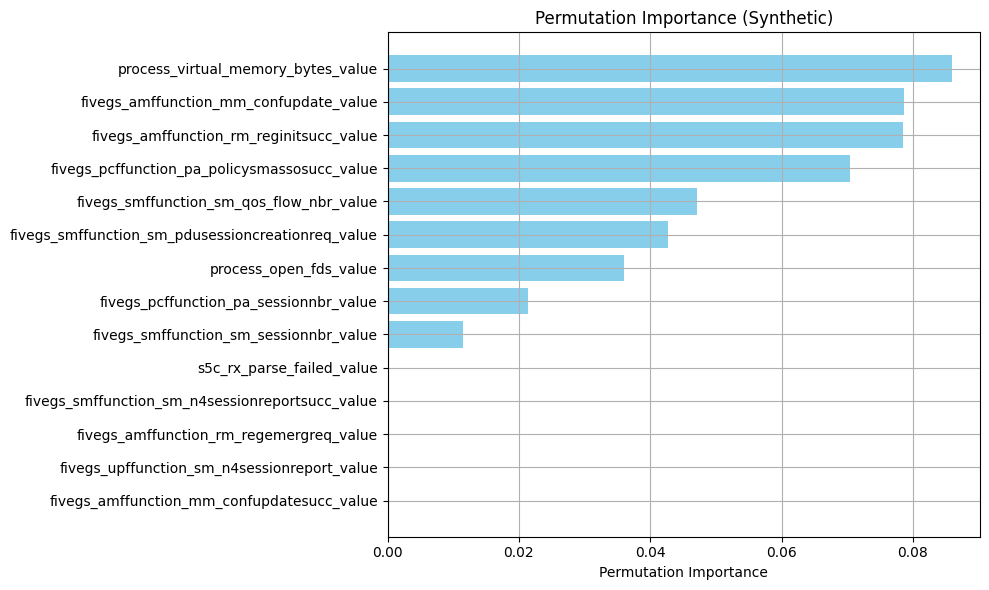

Feature  \
2                  process_virtual_memory_bytes_value   
9              fivegs_amffunction_mm_confupdate_value   
3             fivegs_amffunction_rm_reginitsucc_value   
6        fivegs_pcffunction_pa_policysmassosucc_value   
5            fivegs_smffunction_sm_qos_flow_nbr_value   
13  fivegs_smffunction_sm_pdusessioncreationreq_value   
0                              process_open_fds_value   
8              fivegs_pcffunction_pa_sessionnbr_value   
4              fivegs_smffunction_sm_sessionnbr_value   
1                           s5c_rx_parse_failed_value   
7     fivegs_smffunction_sm_n4sessionreportsucc_value   
10            fivegs_amffunction_rm_regemergreq_value   
11        fivegs_upffunction_sm_n4sessionreport_value   
12         fivegs_amffunction_mm_confupdatesucc_value   

    Permutation_Importance_Synthetic  
2                           0.085930  
9                           0.078626  
3                           0.078430  
6                           0.070472  
5                           0.047195  
13                          0.042757  
0                           0.035987  
8                           0.021392  
4                           0.011509  
1                           0.000000  
7                           0.000000  
10                          0.000000  
11                          0.000000  
12                          0.000000

In [41]:
permut_imp(data, selected_features, "Synthetic", True)

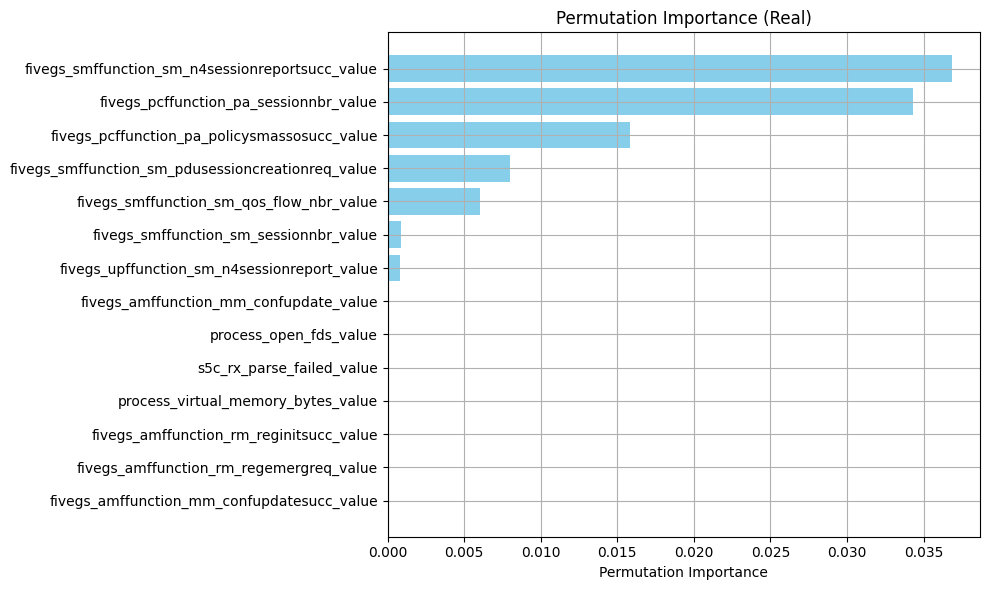

Feature  \
7     fivegs_smffunction_sm_n4sessionreportsucc_value   
8              fivegs_pcffunction_pa_sessionnbr_value   
6        fivegs_pcffunction_pa_policysmassosucc_value   
13  fivegs_smffunction_sm_pdusessioncreationreq_value   
5            fivegs_smffunction_sm_qos_flow_nbr_value   
4              fivegs_smffunction_sm_sessionnbr_value   
11        fivegs_upffunction_sm_n4sessionreport_value   
9              fivegs_amffunction_mm_confupdate_value   
0                              process_open_fds_value   
1                           s5c_rx_parse_failed_value   
2                  process_virtual_memory_bytes_value   
3             fivegs_amffunction_rm_reginitsucc_value   
10            fivegs_amffunction_rm_regemergreq_value   
12         fivegs_amffunction_mm_confupdatesucc_value   

    Permutation_Importance_Real  
7                      0.036846  
8                      0.034311  
6                      0.015859  
13                     0.008018  
5                      0.006043  
4                      0.000884  
11                     0.000796  
9                      0.000059  
0                      0.000000  
1                      0.000000  
2                      0.000000  
3                      0.000000  
10                     0.000000  
12                     0.000000

In [42]:
permut_imp(real_data, selected_features, "Real", True)

<div class="alert alert-block alert-info">
<b>Permutation Importance (Real Data):</b> Permutačná importance odhaľuje reálne silné znaky, ktoré môžu byť v syntetických dátach slabo zastúpené alebo chýbať.<br>
- fivegs_upffunction_sm_n4sessionreport_value má najvyššiu permutačnú dôležitosť, hoci v syntetických dátach nemal žiaden význam – signalizuje možný bias syntetického datasetu.<br>
- process_virtual_memory_bytes_value, ktorý bol vysoko v syntetike, má nulový prínos v realite.<br>
- Prvky ako fivegs_pcffunction_pa_sessionnbr_value alebo fivegs_pcffunction_pa_policysmassosucc_value sa objavili v oboch dátach – potvrdzujú svoju robustnosť naprieč doménami.
</div>


In [43]:
synthetic_perm = permut_imp(data, selected_features, "Synthetic")
real_perm = permut_imp(real_data, selected_features, "Real")

# Overenie, či sú tabuľky prázdne
if synthetic_perm.empty or real_perm.empty:
    raise ValueError("❗ One of the permutation importance tables is empty. Check selected_features or data.")

merged = pd.merge(synthetic_perm, real_perm, on='Feature', how='inner')
merged = merged.merge(summary_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged = merged.rename(columns={'RF_Importance': 'RF_Importance_Synthetic'})
merged = merged.merge(summary_real_df[['Feature', 'RF_Importance']], on='Feature', how='left')
merged = merged.rename(columns={'RF_Importance': 'RF_Importance_Real'})

final_features = merged[
    (merged['RF_Importance_Synthetic'] >= 0) &
    (merged['Permutation_Importance_Real'] >= 0.001)
].sort_values(by='Permutation_Importance_Real', ascending=False)

final_features = final_features['Feature'].tolist()

# Pridáme aj stĺpec log_type a application
new_features = ['log_type', 'application']
final_features = final_features + new_features

output = {"features": final_features}

with open('selected_features.json', 'w') as f:
    json.dump(output, f)

output

{'features': ['fivegs_smffunction_sm_n4sessionreportsucc_value',
  'fivegs_pcffunction_pa_sessionnbr_value',
  'fivegs_pcffunction_pa_policysmassosucc_value',
  'fivegs_smffunction_sm_pdusessioncreationreq_value',
  'fivegs_smffunction_sm_qos_flow_nbr_value',
  'log_type',
  'application']}

In [44]:
def permut_imp_stability(data, selected_features, label, n_runs=10):
    X = data[selected_features]
    y = data['current_uc']
    X_scaled = StandardScaler().fit_transform(X)

    importances = []

    for i in range(n_runs):
        model = RandomForestClassifier(n_estimators=100, random_state=i)
        model.fit(X_scaled, y)
        result = permutation_importance(model, X_scaled, y, n_repeats=5, random_state=i)
        importances.append(result.importances_mean)

    importances = np.array(importances)
    mean_importance = np.mean(importances, axis=0)
    std_importance = np.std(importances, axis=0)
    median_importance = np.median(importances, axis=0)

    stability_df = pd.DataFrame({
        'Feature': selected_features,
        f'PI_Mean_{label}': mean_importance,
        f'PI_Std_{label}': std_importance,
        f'PI_Median_{label}': median_importance
    }).sort_values(by=f'PI_Median_{label}', ascending=False)

    # Vizualizácia
    plt.figure(figsize=(10, 6))
    plt.barh(stability_df['Feature'], stability_df[f'PI_Median_{label}'],
             xerr=stability_df[f'PI_Std_{label}'], color='skyblue')
    plt.xlabel("Median Permutation Importance (± std)")
    plt.title(f"Permutation Importance Stability ({label}) across {n_runs} runs")
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return stability_df


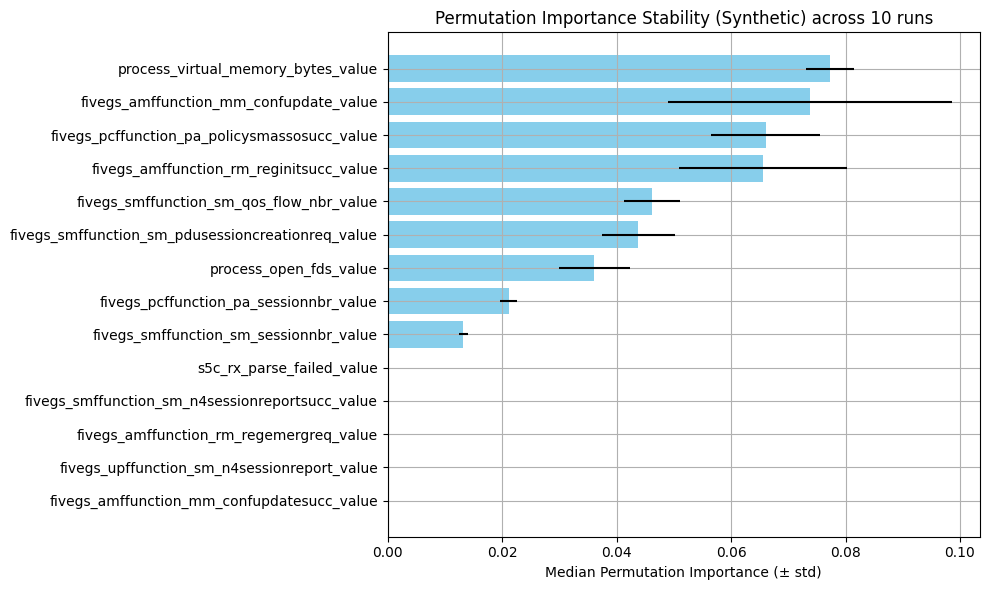

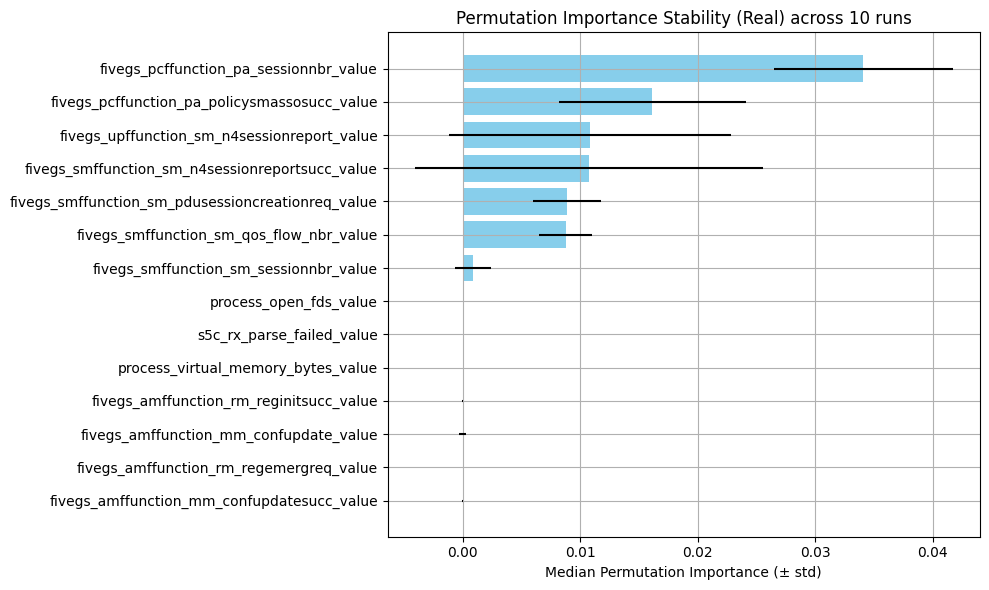

In [45]:
stability_synthetic = permut_imp_stability(data, selected_features, "Synthetic")
stability_real = permut_imp_stability(real_data, selected_features, "Real")

<div class="alert alert-success">
<b>Finálny výber znakov (cross-domain validovaný):</b> Na základe kombinácie Random Forest a Permutation Importance v syntetických aj reálnych dátach sme zvolili znaky, ktoré:<br>
✔ Sú informatívne v syntetike (trénovateľné)<br>
✔ Majú reálnu dôležitosť (reálne použiteľné)<br><br>
<b>Finálny výber (8 znakov):</b><br>
fivegs_pcffunction_pa_policysmassosucc_value<br>
fivegs_smffunction_sm_qos_flow_nbr_value<br>
fivegs_pcffunction_pa_sessionnbr_value<br>
fivegs_smffunction_sm_pdusessioncreationreq_value<br>
fivegs_smffunction_sm_n4sessionreportsucc_value<br>
fivegs_upffunction_sm_n4sessionreport_value (dominantný v reálnych dátach)<br>
log_type (dominantný v syntetických dátach)<br>
application (dominantný v reálnych dátach)<br>
<br>
Týmto výberom minimalizujeme doménový bias a maximalizujeme robustnosť pri generalizácii z trénovania na syntetike do reálneho prostredia.
</div>

<div class="alert alert-info">
<b>Finálny výber znakov (cross-domain validovaný):</b> Finálny výber znakov je založený na kombinácii permutačnej dôležitosti v syntetických a reálnych dátach. Cieľom je zabezpečiť, že výber reflektuje reálne správanie siete, ale zároveň je trénovateľný na syntetických dátach. Do finálnej množiny sme zaradili iba tie znaky, ktoré vykazovali konzistentný informačný prínos naprieč oboma doménami. Týmto prístupom sme eliminovali znaky, ktoré sú síce dominantné v syntetickom prostredí, ale nereprezentujú realitu (napr. process_virtual_memory_bytes_value), čím sa znižuje riziko doménového biasu. 
</div>

## Referencie <a class="anchor" id="Referencie"></a>

1. NGUYEN, Giang. Introduction to Data Science. 1. vyd. Bratislava: Slovak University of Technology in Bratislava, 2022. ISBN 978-80-227-5193-3.

2. Alejopaullier (2024) Make your notebooks look better. https://www.kaggle.com/code/alejopaullier/make-your-notebooks-look-better.

3. Huang, N., Lu, G. and Xu, D., 2016. A permutation importance-based feature selection method for short-term electricity load forecasting using random forest. Energies, 9(10), p.767. Available at: https://doi.org/10.3390/en9100767